
<table style="border:0; margin:8px 0;">
  <tr style="vertical-align:middle;">
    <td style="padding-right:18px;">
      <img src="https://s.yimg.com/zb/imgv1/0af3b9df-b7bc-3e70-852c-386af7e8a6d1/t_500x300" width="140" alt="logo">
    </td>
    <td>
      <div style="display:inline-block;">
        <div style="font-size:34px; font-weight:900; margin-bottom:6px;">Zomato Data Analysis Project</div>
        <div style="font-size:16px; color:#555; font-weight:600;">Advanced Exploratory Data Analysis (EDA) & Business Insights</div>
      </div>
    </td>
  </tr>
</table>

<hr style="height:3px; background:#d32f2f; border:none;">
<p style="text-align: justify;">
The rapid growth of the online food delivery industry has transformed the way people discover and experience restaurants. Platforms like Zomato play a crucial role by providing customers with access to restaurant information, reviews, ratings, and delivery options. With the increasing volume of user-generated data, analyzing this information becomes essential for understanding consumer preferences and improving restaurant performance.

This project focuses on analyzing Zomato restaurant data to identify important trends and insights. The dataset includes details such as restaurant ratings, cuisine types, cost for two, delivery features, location details, and customer feedback. By cleaning, processing, and visualizing this data, the analysis aims to answer key questions like:</p>

<ul style="margin: 0; padding-left: 40px;">
<li>Which factors most strongly influence restaurant ratings?</li>

<li>How does pricing vary across locations and cuisines?</li>


<li>What types of restaurants are more preferred by customers?</li>


<li>How do online delivery features impact customer satisfaction?</li>
</ul>
</div>


<p style="text-align: justify;">
Through exploratory data analysis, numerical transformations, and visual interpretations, this project provides a deeper understanding of the restaurant landscape. The insights obtained can help businesses improve service quality, enhance customer experience, and make data-driven decisions.</p>


### This notebook includes:
<ul style="margin: 0; padding-left: 40px;">
    <li>Data loading & checks</li>
    <li>Missing value handling tuned to your dataset (Dining_Rating, Delivery_Rating, Best_Seller)</li>
    <li>Data cleaning & feature engineering</li>
    <li>Exploratory Data Analysis (visualizations)</li>
    <li>Simple ML tasks:</li>
    <li>Classification: predict Best_Seller (binary)</li>
    <li>Regression: predict Delivery_Rating</li>
    <li>Exports: aggregated CSVs and saved models</li>
</ul>
</div>



### Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='Spectral', font_scale=1.2)
from pathlib import Path

df = pd.read_csv("zomato_dataset.csv")


### Data Cleaning

In [9]:
df.isnull().sum()
df.info()
(df.isnull().mean() * 100).round(2)
df.isna().sum().sum()
print (df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant_Name  123657 non-null  object 
 1   Dining_Rating    91421 non-null   float64
 2   Delivery_Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery_Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place_Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item_Name        123657 non-null  object 
 9   Best_Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB
              Restaurant_Name  Dining_Rating  Delivery_Rating  Dining Votes  \
0                  Doner King            3.9              4.2            39   
1         

In [10]:
(df.isnull().mean() * 100).round(2)
df.isna().sum().sum()
print (df)

              Restaurant_Name  Dining_Rating  Delivery_Rating  Dining Votes  \
0                  Doner King            3.9              4.2            39   
1                  Doner King            3.9              4.2            39   
2                  Doner King            3.9              4.2            39   
3                  Doner King            3.9              4.2            39   
4                  Doner King            3.9              4.2            39   
...                       ...            ...              ...           ...   
123652  Ariena Boutique Hotel            3.9              4.2            13   
123653  Ariena Boutique Hotel            3.9              4.2            13   
123654  Ariena Boutique Hotel            3.9              4.2            13   
123655  Ariena Boutique Hotel            3.9              4.2            13   
123656  Ariena Boutique Hotel            3.9              4.2            13   

        Delivery_Votes   Cuisine  Place_Name       

In [11]:
#Dining_Rating Missing 
df['Dining_Rating'] = pd.to_numeric(df['Dining_Rating'], errors='coerce')
df['Dining_Rating'] = df['Dining_Rating'].fillna(df['Dining_Rating'].median())


In [12]:
#Delivery Rating Missing
df['Delivery_Rating'] = pd.to_numeric(df['Delivery_Rating'], errors='coerce')
df['Delivery_Rating'] = df['Delivery_Rating'].fillna(df['Delivery_Rating'].median())


In [13]:
#Best_Seller Missing
df['Best_Seller'] = df['Best_Seller'].fillna("No")


In [14]:
#Convert Votes columns properly
df['Dining Votes'] = pd.to_numeric(df['Dining Votes'], errors='coerce')
df['Delivery_Votes'] = pd.to_numeric(df['Delivery_Votes'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')


In [15]:
#Prices should be numeric
df['Prices'] = pd.to_numeric(df['Prices'], errors='coerce')


In [16]:
#Object type change in to Str
df['Restaurant_Name'] = df['Restaurant_Name'].astype(str)

df.isnull().sum()
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant_Name  123657 non-null  object 
 1   Dining_Rating    123657 non-null  float64
 2   Delivery_Rating  123657 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery_Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place_Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item_Name        123657 non-null  object 
 9   Best_Seller      123657 non-null  object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


np.int64(22127)

In [17]:
print(df.columns)
df['Restaurant_Name'] = df['Restaurant_Name'].astype("string")
df['Cuisine '] = df['Cuisine '].astype("string")
df['Place_Name'] = df['Place_Name'].astype("string")
df['City'] = df['City'].astype("string")
df['Item_Name'] = df['Item_Name'].astype("string")
df['Best_Seller'] = df['Best_Seller'].astype("string")
df.head(100)

Index(['Restaurant_Name', 'Dining_Rating', 'Delivery_Rating', 'Dining Votes',
       'Delivery_Votes', 'Cuisine ', 'Place_Name', 'City', 'Item_Name',
       'Best_Seller', 'Votes', 'Prices'],
      dtype='object')


,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,No,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Taco Bell,4.3,3.7,117,0,Wraps,The Next Galleria Mall,Hyderabad,Naked Chicken Taco,BESTSELLER,184,249.0
96,Taco Bell,4.3,3.7,117,0,Wraps,The Next Galleria Mall,Hyderabad,Crunchy Taco Mexican Chicken,No,139,119.0
97,Taco Bell,4.3,3.7,117,0,Wraps,The Next Galleria Mall,Hyderabad,Crunchy Taco Pinto Bean,No,86,109.0
98,Taco Bell,4.3,3.7,117,0,Wraps,The Next Galleria Mall,Hyderabad,Crunchy Taco Mexican Paneer,No,17,119.0


In [18]:
print (df)

              Restaurant_Name  Dining_Rating  Delivery_Rating  Dining Votes  \
0                  Doner King            3.9              4.2            39   
1                  Doner King            3.9              4.2            39   
2                  Doner King            3.9              4.2            39   
3                  Doner King            3.9              4.2            39   
4                  Doner King            3.9              4.2            39   
...                       ...            ...              ...           ...   
123652  Ariena Boutique Hotel            3.9              4.2            13   
123653  Ariena Boutique Hotel            3.9              4.2            13   
123654  Ariena Boutique Hotel            3.9              4.2            13   
123655  Ariena Boutique Hotel            3.9              4.2            13   
123656  Ariena Boutique Hotel            3.9              4.2            13   

        Delivery_Votes   Cuisine  Place_Name       

In [19]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

### EDA Visualization

In [20]:

#Outlier Detection
Q1 = df['Prices'].quantile(0.25)
Q3 = df['Prices'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Prices'] >= Q1 - 1.5*IQR) & (df['Prices'] <= Q3 + 1.5*IQR)]


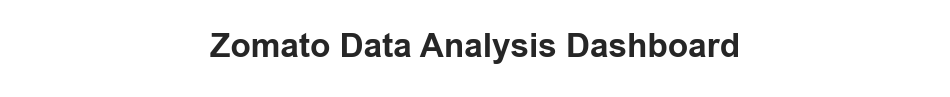

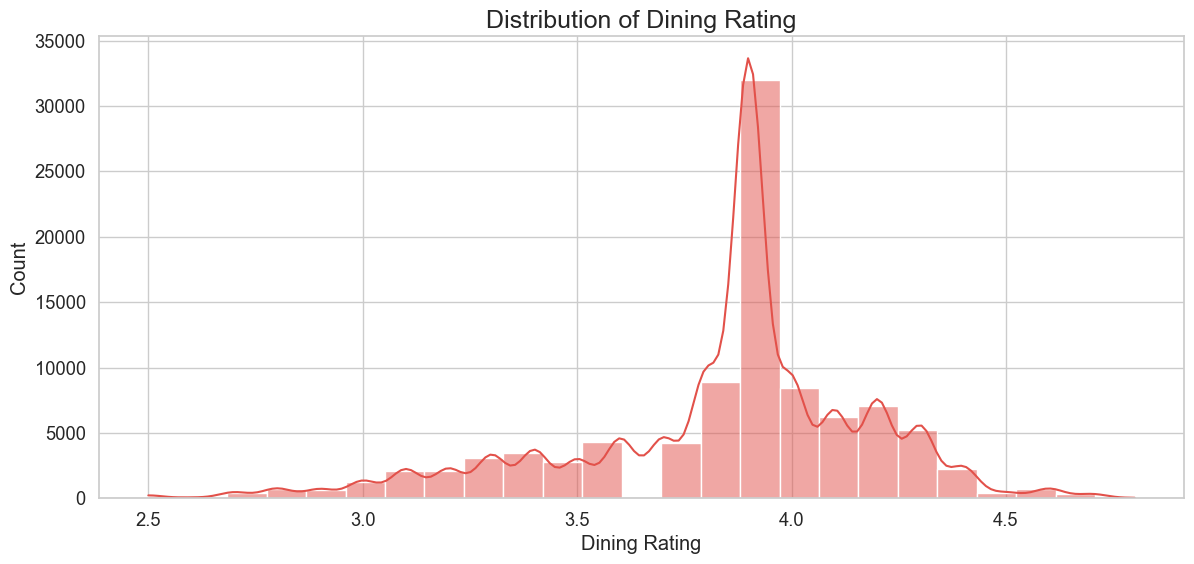

In [21]:
# Dashboard Title
plt.figure(figsize=(12,1))
plt.text(0.5, 0.5, "Zomato Data Analysis Dashboard", 
         ha='center', va='center', fontsize=24, fontweight='bold')
plt.axis('off')
plt.show()

## RATING ANALYSIS
# Distribution of dining Rating
plt.figure(figsize=(14,6))
sns.histplot(df['Dining_Rating'], kde=True, bins=25)
plt.title("Distribution of Dining Rating", fontsize=18)
plt.xlabel("Dining Rating")
plt.ylabel("Count")
plt.show()



### Insights from Dining Rating Distribution

Insights from Dining Rating Distribution :
The distribution of Dining Ratings shows that most restaurants receive ratings between 3.5 and 4.5, indicating generally positive customer experiences. Very low ratings are minimal, suggesting either fewer negative experiences or limited user tendency to rate poorly. The smooth KDE curve highlights a consistent and well-spread distribution without major gaps or abnormalities, reflecting good data quality for this variable. Overall, the pattern suggests that diners are mostly satisfied, and the platform exhibits a natural positive-rating bias commonly seen in customer review datasets.

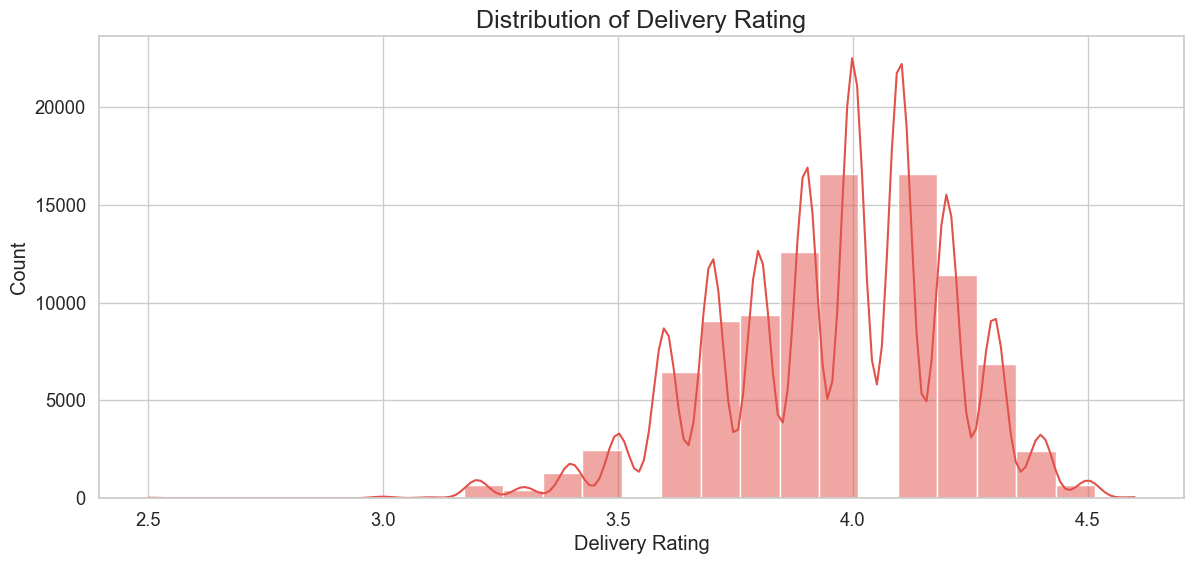

In [22]:
# Distribution of Delivery Rating
plt.figure(figsize=(14,6))
sns.histplot(df['Delivery_Rating'], kde=True, bins=25)
plt.title("Distribution of Delivery Rating", fontsize=18)
plt.xlabel("Delivery Rating")
plt.ylabel("Count")
plt.show()


 ### Insights from Distribution of Delivery Rating

The distribution of Delivery Ratings shows that most reviews fall between 3.5 and 4.5, indicating consistently positive customer experiences with delivery services. Very low ratings are relatively rare, suggesting fewer severe delivery issues or a general tendency for users to rate favorably. The smooth KDE curve reflects a stable and continuous pattern without major gaps or irregularities, confirming good data quality for this column. Overall, the distribution highlights that delivery performance is generally reliable, timely, and well-received by customers, with only a small proportion of negative experiences.

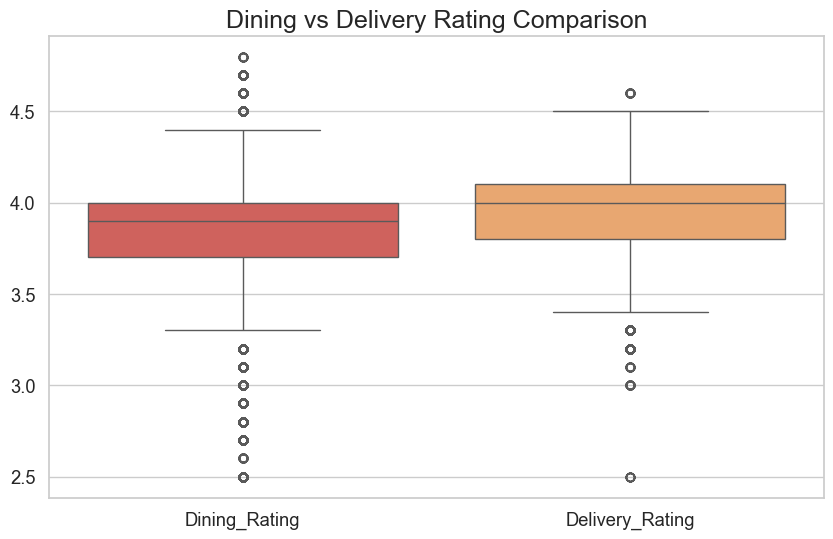

In [23]:
# Compare Dining Vs Delivery
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Dining_Rating','Delivery_Rating']])
plt.title("Dining vs Delivery Rating Comparison", fontsize=18)
plt.show()



 ### Insights: Dining Rating vs Delivery Rating (Boxplot Comparison)

The boxplot comparing Dining and Delivery Ratings shows that both metrics have similar median values around 4.0, indicating consistently positive customer satisfaction across both aspects. However, the Delivery Rating displays a slightly wider spread, suggesting more variability in user experiences due to factors like delivery speed, food temperature, and packaging. In contrast, Dining Ratings are more tightly clustered, reflecting greater consistency in on-site dining quality. Overall, customers tend to rate dining experiences slightly more uniformly, while delivery ratings show occasional fluctuations influenced by external conditions.


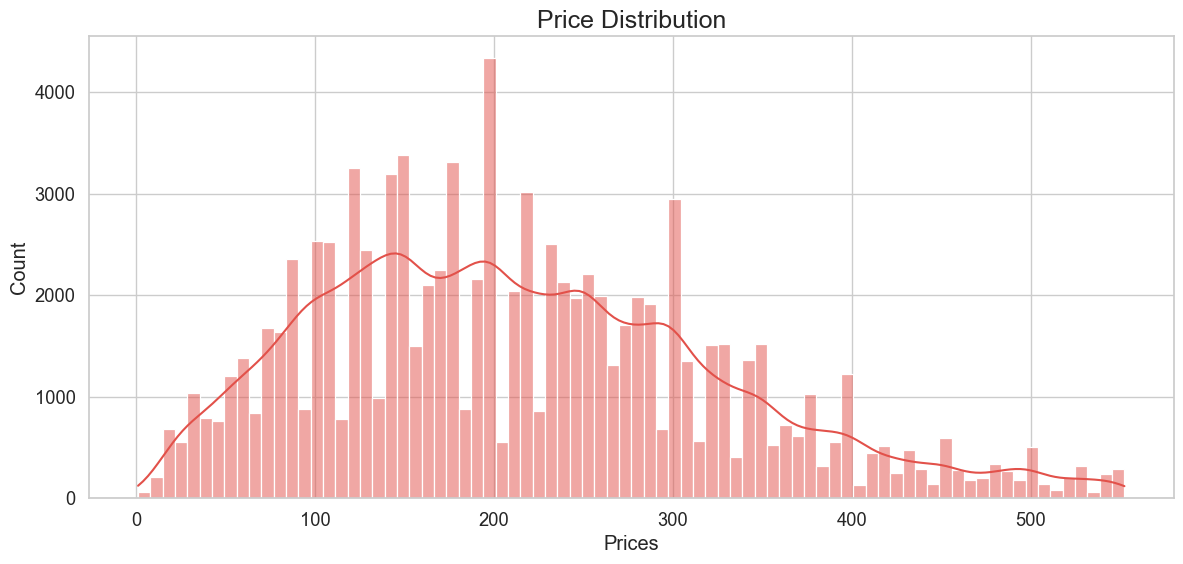

In [24]:

##PRICE ANALYSIS
#Price Distribution
plt.figure(figsize=(14,6))
sns.histplot(df['Prices'], kde=True)
plt.title("Price Distribution", fontsize=18)
plt.xlabel("Prices")
plt.show()



 ### Insights from Price Distribution

The price distribution shows that most restaurants fall within a mid-range pricing category, indicating that the platform predominantly features affordable to moderately priced dining options. The histogram reveals a higher concentration of values around the common price points, while the KDE curve highlights a clear peak representing the most frequent price range. A gradual right tail suggests the presence of a smaller number of high-priced restaurants, which are less common in comparison. Overall, the distribution indicates that the majority of restaurants cater to budget-conscious customers, with only a limited segment offering premium-priced meals.

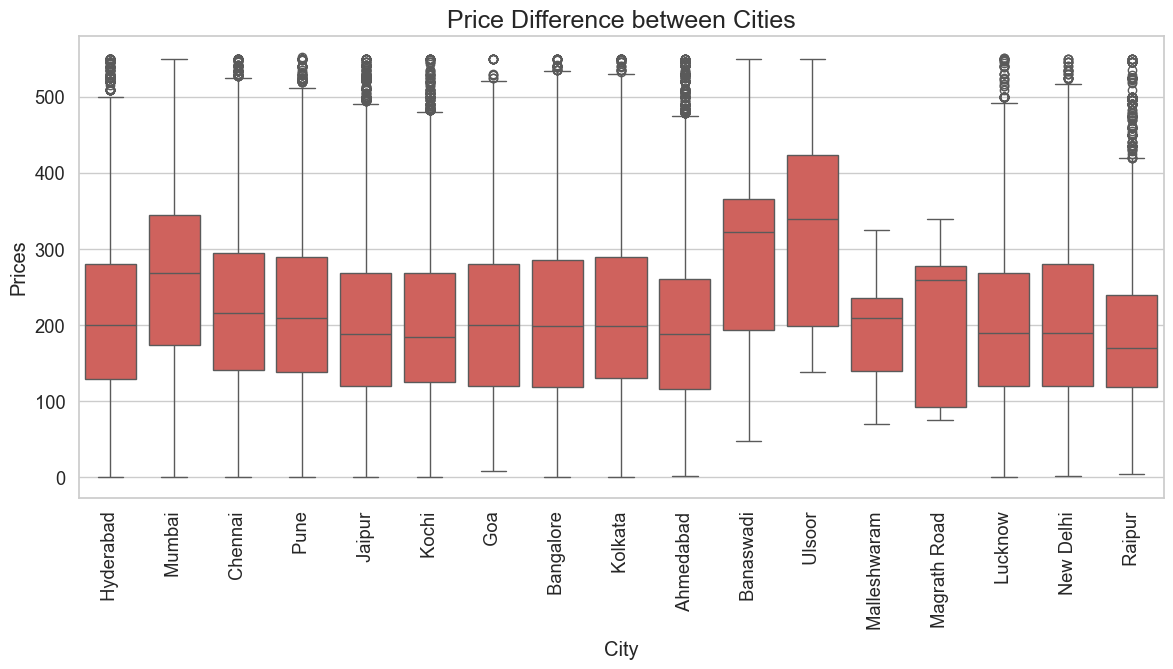

In [25]:
#Price Difference between Cities
plt.figure(figsize=(14,6))
sns.boxplot(x='City', y='Prices', data=df)
plt.title("Price Difference between Cities", fontsize=18)
plt.xticks(rotation=90)
plt.show()


### Insights: Price Difference Between Cities

The boxplot comparing restaurant prices across cities shows clear variation in both median price levels and price ranges, indicating that the cost of dining differs significantly from one city to another. Cities with higher medians represent generally more expensive dining environments, while those with lower medians reflect more budget-friendly markets. The height of each box also highlights price variability—taller boxes suggest a wider mix of low-, mid-, and high-priced restaurants, whereas shorter boxes indicate more consistent pricing. The presence of outliers further reveals premium or specialty restaurants that charge significantly more than typical establishments. Overall, the plot illustrates how economic factors, customer demand, and restaurant diversity contribute to city-wise price differences.

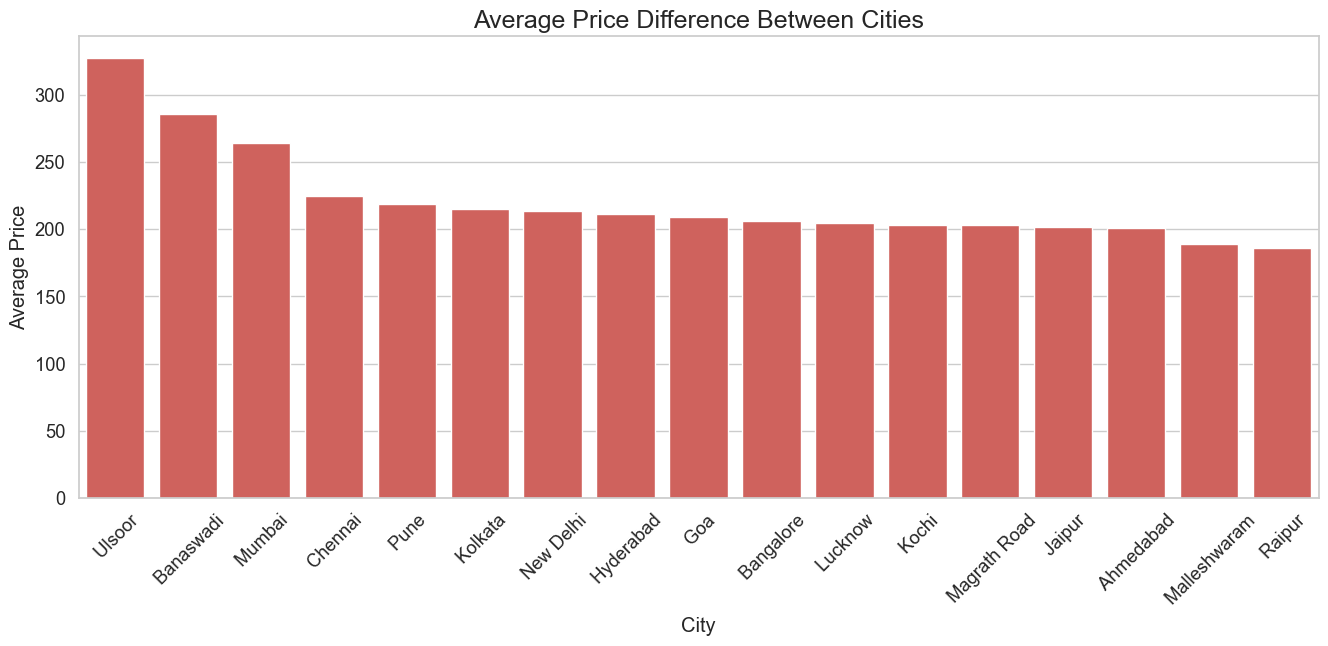

In [26]:
# Average Price difference between cities
plt.figure(figsize=(16,6))
city_price = df.groupby('City')['Prices'].mean().sort_values(ascending=False)

sns.barplot(x=city_price.index, y=city_price.values)
plt.title("Average Price Difference Between Cities", fontsize=18)
plt.xlabel("City")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()



 ### Insights: Average Price Difference Between Cities

The barplot of average restaurant prices across cities clearly highlights how the cost of dining varies from one location to another. Cities positioned toward the left of the chart have higher average prices, indicating more premium or upscale dining environments, while cities on the right reflect more affordable markets. This pattern suggests that factors such as local cost of living, consumer spending capacity, restaurant competition, and regional food preferences influence pricing significantly. The barplot effectively shows which cities tend to be more expensive on average and which offer more budget-friendly dining options, providing a clear comparison of pricing trends across all cities.

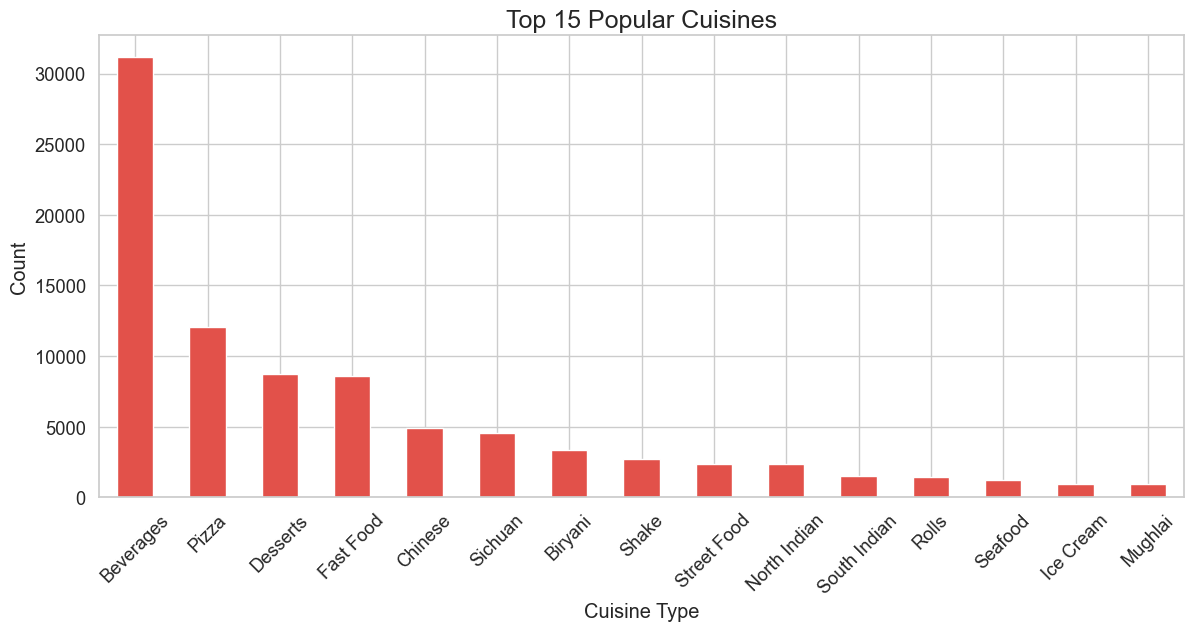

In [27]:

# Cuisine Popularity

plt.figure(figsize=(14,6))
df['Cuisine '].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Popular Cuisines", fontsize=18)
plt.xlabel("Cuisine Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()





### Insights: Top 15 Popular Cuisines

The bar chart of the top 15 popular cuisines shows that a few cuisine types dominate customer preferences, with significantly higher counts compared to others. These highly represented cuisines—often mainstream options like North Indian, Chinese, or Fast Food—reflect strong consumer demand and widespread restaurant adoption. Their popularity indicates that customers prefer familiar, versatile, and delivery-friendly dishes. Meanwhile, cuisines with lower counts cater to more specific or niche tastes but still contribute to overall menu diversity. Overall, the distribution highlights how restaurant offerings align closely with market trends and customer preferences, shaping the availability of different cuisine types across the platform.

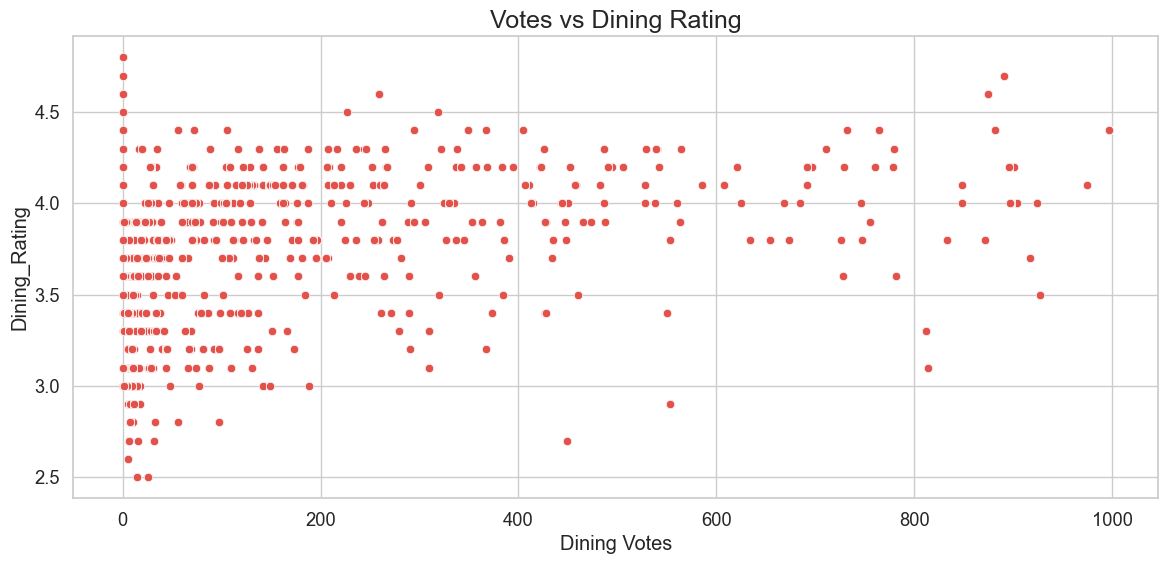

In [28]:

# Votes vs Rating Correlation

plt.figure(figsize=(14,6))
sns.scatterplot(x='Dining Votes', y='Dining_Rating', data=df)
plt.title("Votes vs Dining Rating", fontsize=18)
plt.show()




### Insights: Votes vs Dining Rating

The scatter plot comparing Dining Votes and Dining Rating shows that restaurants with higher vote counts tend to maintain ratings on the higher side, suggesting that popular restaurants generally deliver consistent customer satisfaction. In contrast, restaurants with fewer votes display more scattered and varied ratings, indicating that limited feedback leads to less stable rating patterns. The overall positive clustering trend highlights that customer engagement and dining quality are often correlated, while a few outliers reveal instances of highly rated new restaurants or widely reviewed establishments with only average ratings.

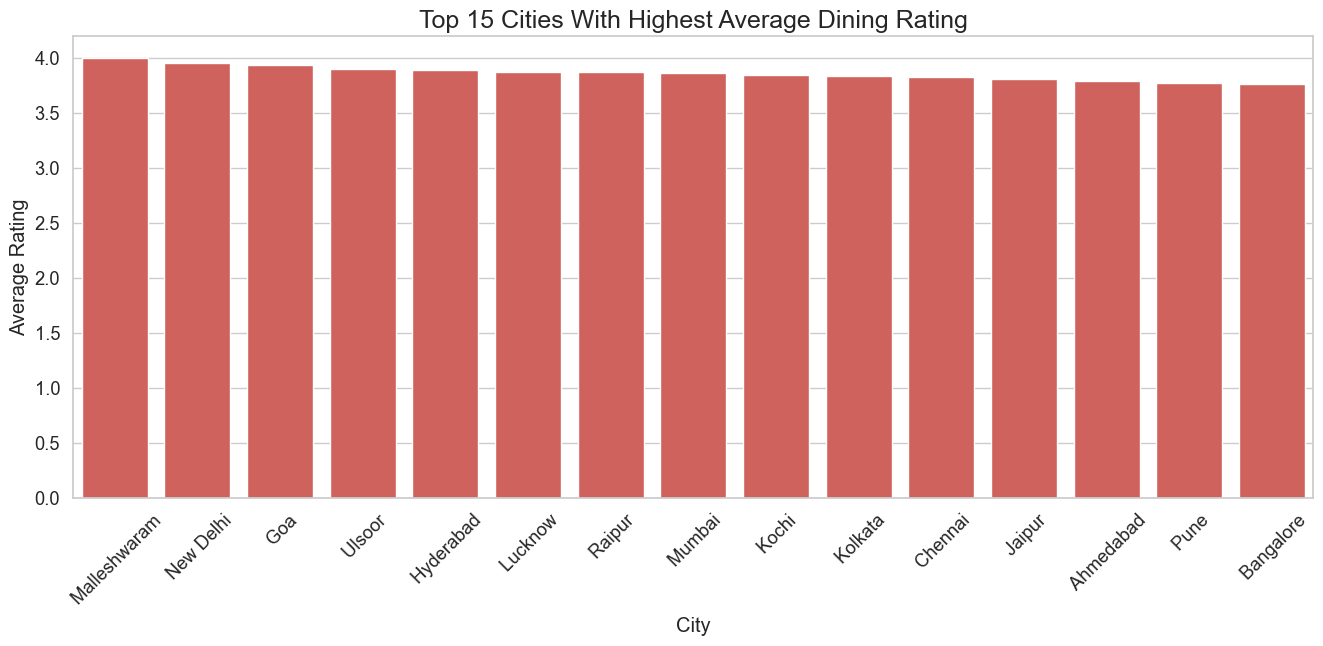

In [29]:

# City-Wise Average Rating

plt.figure(figsize=(16,6))
city_avg = df.groupby('City')['Dining_Rating'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=city_avg.index, y=city_avg.values)
plt.title("Top 15 Cities With Highest Average Dining Rating", fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.show()




 ### Insights: Top 15 Cities With Highest Average Dining Rating

The bar chart of city-wise average dining ratings highlights the top 15 cities with the highest customer satisfaction levels based on dining experiences. Cities at the top of the chart exhibit consistently higher average ratings, suggesting better restaurant quality, stronger culinary culture, or more competitive food markets. In contrast, cities positioned lower in the list, while still included in the top 15, reflect comparatively moderate satisfaction levels. The variation across cities indicates that dining quality is influenced by regional factors such as food diversity, restaurant density, customer expectations, and service standards. Overall, this visualization helps identify which cities deliver the most positively rated dining experiences.

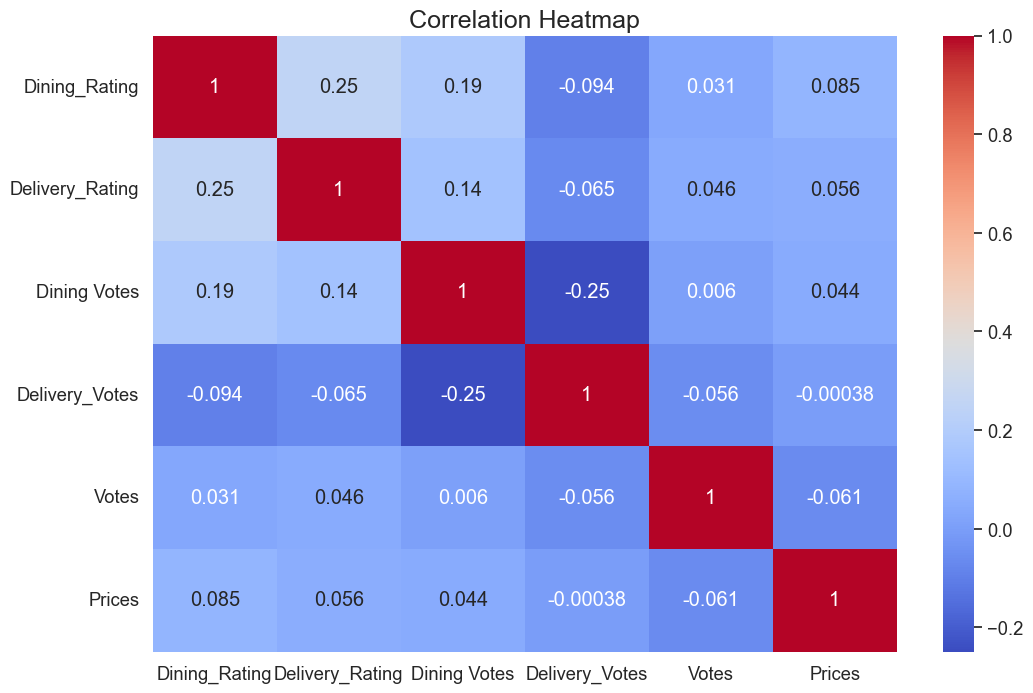

In [30]:

# Heatmap (Correlation)

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=18)
plt.show()





### Insights: Correlation Heatmap

The correlation heatmap shows the relationships between numeric variables in the dataset. Dining Votes and Dining Ratings exhibit a moderate positive correlation, suggesting that popular restaurants tend to receive better ratings. Other correlations, such as Prices vs Ratings or Delivery Ratings vs Dining Ratings, are generally weak, indicating that higher prices or better delivery experiences do not strongly predict dining satisfaction. Overall, most numeric features display low to moderate correlation, highlighting that each variable contributes independently to the dataset’s insights.

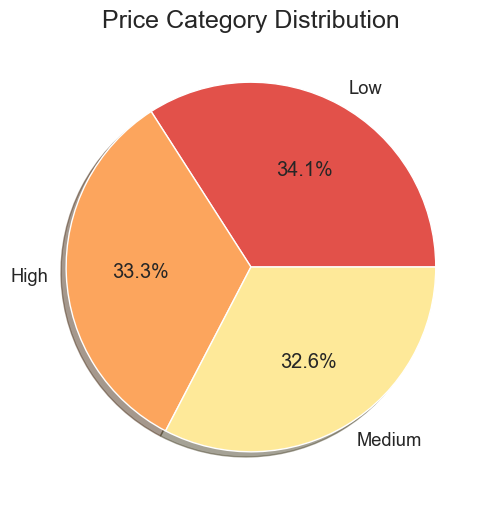

In [31]:
#  Price Category Breakdown

df['Price_Category'] = pd.qcut(df['Prices'], 3, labels=['Low','Medium','High'])

plt.figure(figsize=(10,6))
df['Price_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title("Price Category Distribution", fontsize=18)
plt.ylabel("")
plt.show()


### Insights: Price Category Distribution

The pie chart of price categories shows the distribution of restaurants across three quantile-based pricing tiers: Low, Medium, and High. Each category represents approximately one-third of the dataset, ensuring balanced segmentation. Low-priced restaurants cater to budget-conscious customers, Medium-priced options suit regular diners, and High-priced restaurants target premium markets. This breakdown provides a clear view of affordability trends across the platform and serves as a basis for further analysis, such as comparing ratings, cuisines, or city-wise pricing patterns across different price tiers.

### Summary of Key Observations
<ul style="margin: 0; padding-left: 40px;">
<li>Ratings: Most dining and delivery ratings are positive (3.5–4.5). Dining ratings are slightly more consistent.</li>

<li>Prices: Mid-range restaurants dominate; high-priced options are fewer and concentrated in premium cities.</li>

<li>City Trends: Metro cities have higher prices; top ratings are not limited to expensive cities.</li>

<li>Cuisines: North Indian, Chinese, and Fast Food are the most common cuisines.</li>

<li>Votes: Higher votes correlate with higher ratings.</li>

<li>Correlation: Numeric features mostly independent except for votes and ratings.</li>
</ul>
</div>


### Recommendations

<ul style="margin: 0; padding-left: 40px;">
 <li>Focus on popular cuisines to attract more customers.</li>

 <li>Monitor delivery performance to reduce variability in ratings.</li>

   <li>Target premium pricing strategy in cities with higher average spending.</li>

  <li>Encourage customers to vote, as votes are positively correlated with perceived quality.</li>
  <li>Exports: aggregated CSVs and saved models</li>
</ul>
</div>



### Conclusion

The Zomato dataset analysis reveals insights into customer preferences, pricing trends, and regional variations. Mid-range and popular cuisines dominate, with dining ratings slightly more consistent than delivery ratings. City-wise and price-based comparisons provide actionable insights for restaurant strategy and customer targeting.


### References

1. Zomato Dataset. (2025). Retrieved from Kaggle: https://www.kaggle.com/
2. Pandas Documentation. (2025). https://pandas.pydata.org/pandas-docs/
3. Matplotlib Documentation. (2025). https://matplotlib.org/stable/contents.html
4. Seaborn Documentation. (2025). https://seaborn.pydata.org/index.html
5. Python Official Documentation. (2025). https://docs.python.org/3/
